# Exercise Chapter 10_ex 
Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
import lifelines
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import mistat

# Exercise 1

<AxesSubplot:>

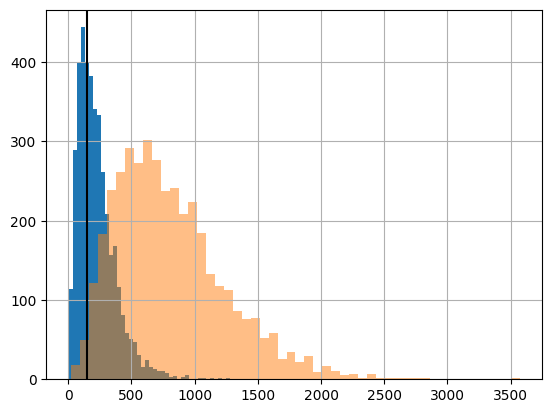

In [3]:
ttf = pd.Series(stats.gamma(2.25, scale=1/0.01).rvs(4000))
ax = ttf.hist(bins=40)
ax.axvline(150, color='black')

post_ttf = pd.Series(stats.gamma(3.25, scale=1/0.004).rvs(4000))
post_ttf.hist(bins=50, alpha=0.5)

# Exercise 3

<AxesSubplot:xlabel='x'>

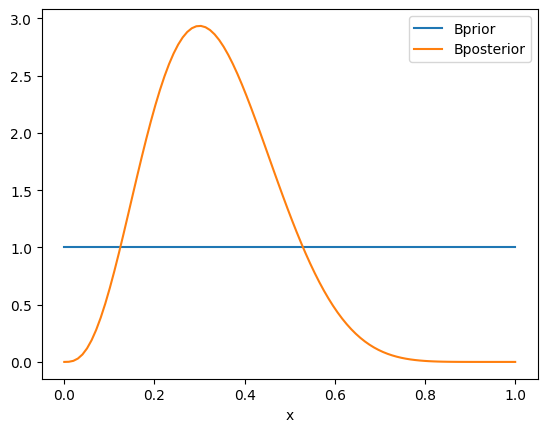

In [4]:
x = np.linspace(0, 1, 100)
df = pd.DataFrame({'x': x, 'Bprior': stats.beta(1,1).pdf(x)})
df['Bposterior'] = stats.beta(1+3,1 + 10 - 3).pdf(x)

ax = df.plot(x='x', y='Bprior')
df.plot(x='x', y='Bposterior', ax=ax)

# Exercise 5

In [5]:
n = 50; Kn = 49
medFdist = stats.f.ppf(0.5, 2*Kn+2, 2*n+2-2*Kn)
R_t = (Kn+1) * medFdist / (n+1 -Kn+(Kn+1)*medFdist)
R_t

0.9673091500837799

# Exercise 6

In [6]:
v1 = 2.5; v2 = 2.75; v3 = 3; n=r=10
tau = 1/1000
T1 = 4565; T2 = 5720; T3 = 7505
def R(t, Ti, tau, r, v):
    return ((1 + Ti*tau)/(1+(Ti + t)*tau))**(r+v)
t = np.linspace(0, 3000, 100)
df = pd.DataFrame({
    't': t,
    'R1': R(t, T1, tau, r, v1),
    'R2': R(t, T2, tau, r, v2),
    'R3': R(t, T3, tau, r, v3),
})
df['Rsys'] = df['R3'] + df['R1']*df['R2'] - df['R1']*df['R2']*df['R3']

<AxesSubplot:xlabel='t'>

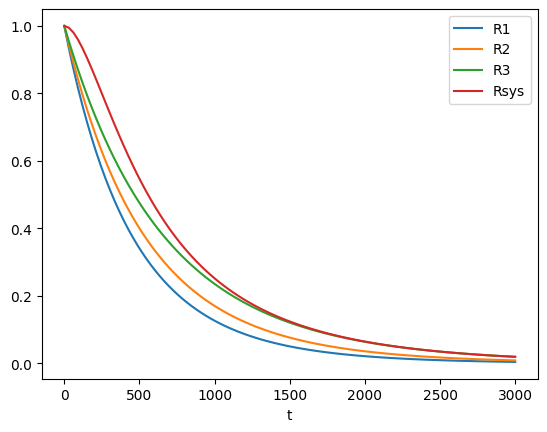

In [7]:
df.plot(x='t')

# Exercise 7

In [8]:
n = 30
Kn = 28
gamma = 0.95

v1 = Kn + 1; v2 = n - Kn + 1
eps1 = (1-gamma)/2; eps2 = (1+gamma)/2

F_ll = stats.f.ppf(eps2, 2*n+2-2*Kn, 2*Kn+2)
F_ul = stats.f.ppf(eps2, 2*Kn+2, 2*n+2-2*Kn)
print(f'F-distribution median: ({F_ll:.3f}, {F_ul:.3f})')

LL = (Kn+1) / ((Kn+1) + (n-Kn+1)*F_ll)
UL = (Kn+1)*F_ul / ((n-Kn+1)+(Kn+1)*F_ul)
print(f'Credibility limits: ({LL:.3f}, {UL:.3f})')

F-distribution median: (2.635, 4.963)
Credibility limits: (0.786, 0.980)


# Exercise 8

In [9]:
gamma = 0.95
t = 25
nu = 3
tau = 0.01
r = 27
Tnr = 3500

eps1 = (1-gamma)/2; eps2 = (1+gamma)/2

beta_L = (Tnr + 1/tau) / stats.gamma.ppf(eps2, nu+r, 1)
beta_U = (Tnr + 1/tau) / stats.gamma.ppf(eps1, nu+r, 1)
print(f'Credibility limits beta: ({beta_L:.2f}, {beta_U:.2f})')

RL = np.exp(-t / beta_L)
RU = np.exp(-t / beta_U)
RL, RU
print(f'Credibility limits R(50): ({RL:.3f}, {RU:.3f})')

Credibility limits beta: (84.41, 169.48)
Credibility limits R(50): (0.744, 0.863)
